<a href="https://colab.research.google.com/github/Diwash17/Iris-data-anlaysis/blob/main/Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [74]:
df=pd.read_csv('/content/Iris.csv',encoding='latin-1')

In [75]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [76]:
df.shape

(150, 6)

In [77]:
df.drop('Id',axis=1,inplace=True)

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [79]:
df.duplicated().sum()

3

In [80]:
df.drop_duplicates(inplace=True)

In [81]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [82]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [83]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,147.0,5.856463,0.829100,4.3,5.1,5.8,6.4,7.9
SepalWidthCm,147.0,3.055782,0.437009,2.0,2.8,3.0,3.3,4.4
PetalLengthCm,147.0,3.780272,1.759111,1.0,1.6,4.4,5.1,6.9
PetalWidthCm,147.0,1.208844,0.757874,0.1,0.3,1.3,1.8,2.5


In [84]:
df['Species'].nunique()

3

In [85]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [86]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
47,4.6,3.2,1.4,0.2,Iris-setosa


In [87]:
df['Species'].mode()

0    Iris-versicolor
Name: Species, dtype: object

<Axes: xlabel='SepalLengthCm', ylabel='Count'>

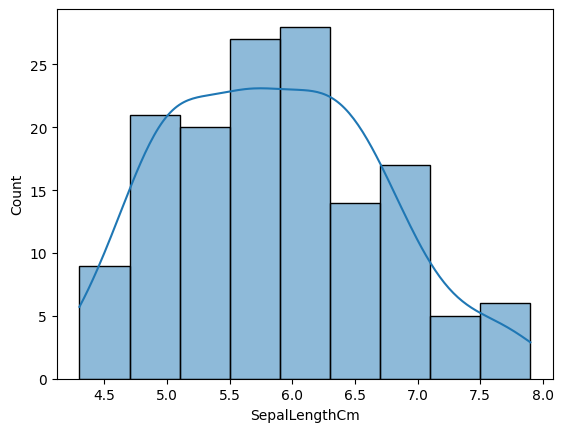

In [88]:
sns.histplot(df['SepalLengthCm'],kde=True)

<Axes: xlabel='PetalWidthCm', ylabel='Count'>

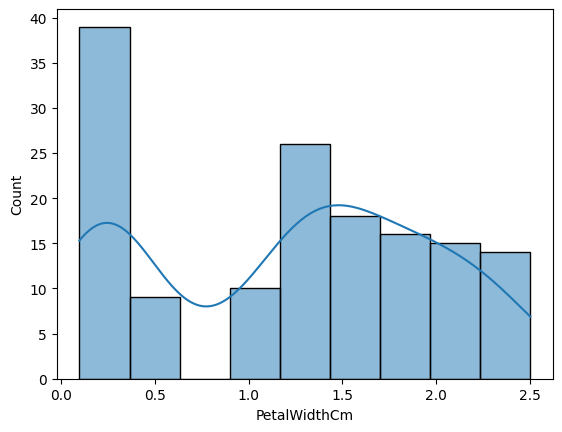

In [89]:
sns.histplot(df['PetalWidthCm'],kde=True)

In [90]:
px.pie(names=df['Species'])

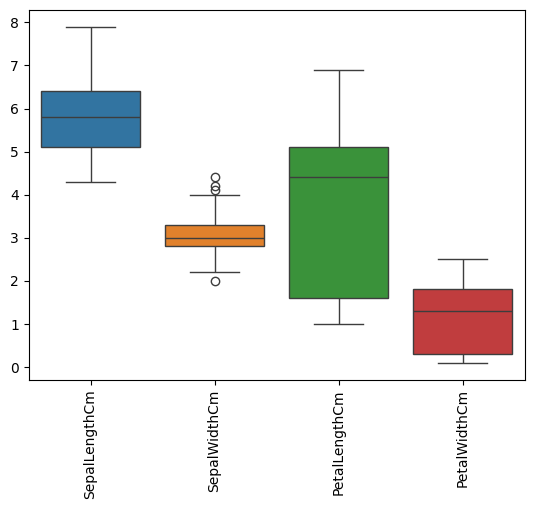

In [91]:
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [92]:
corr_matrix=df.corr(method='pearson',numeric_only=True)

In [93]:
corr_matrix

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109321,0.871305,0.817058
SepalWidthCm,-0.109321,1.000000,-0.421057,-0.356376
PetalLengthCm,0.871305,-0.421057,1.000000,0.961883
PetalWidthCm,0.817058,-0.356376,0.961883,1.000000


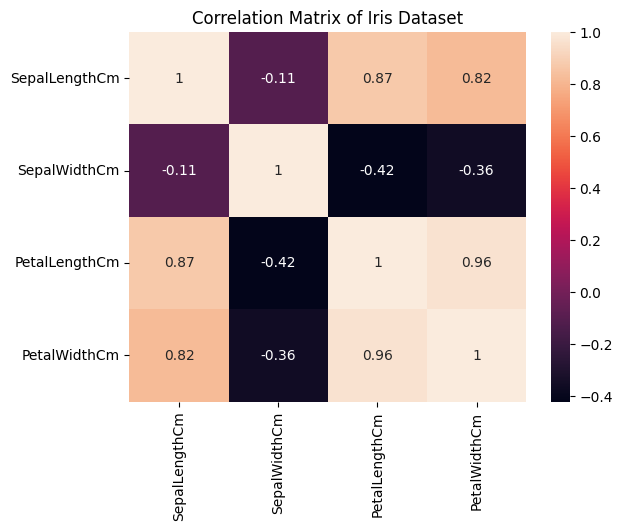

In [94]:
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Matrix of Iris Dataset')
plt.show()

# feature engineering

Removing outlier from SepalWidthCm

In [95]:
Q1 = np.percentile(df['SepalWidthCm'], 25, method='midpoint')
print(f'Q1(25 percentile) is {Q1}')
Q3 = np.percentile(df['SepalWidthCm'], 75, method='midpoint')
print(f'Q3(75 percentile) is {Q3}')
IQR = Q3 - Q1
print(f'IQR is {IQR}')

Q1(25 percentile) is 2.8
Q3(75 percentile) is 3.3
IQR is 0.5


In [96]:
upper_limit= Q3 +1.5*IQR
print(f'Upper limit is {upper_limit}')
lower_limit= Q1- 1.5*IQR
print(f'Lower limit is {lower_limit}')

Upper limit is 4.05
Lower limit is 2.05


In [97]:
df['Sepal_ratio']= df['SepalLengthCm']/df['SepalWidthCm']

In [98]:
df['Petal_ratio']= df['PetalLengthCm']/df['PetalWidthCm']

In [99]:
df.sample()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Sepal_ratio,Petal_ratio
140,6.7,3.1,5.6,2.4,Iris-virginica,2.16129,2.333333
